In [21]:
import numpy as np
import random
#from uniform import uniform
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

## Activation functions

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def cosine(x):
    return np.cos(x)

def gaussian(x):
    return np.exp(-((x**2)/2))

In [5]:
activations_list = [sigmoid,tanh,cosine,gaussian]
act_dict = {0.1:sigmoid, 0.2:tanh, 0.3:cosine, 0.4:gaussian}

In [6]:
f = np.random.choice(list(act_dict.keys()))
f

0.2

In [7]:
h = np.random.choice(list(act_dict.keys()))
h

0.3

### Testing activation functions

In [8]:
test_inputs = np.arange(-10,10,0.01)

Text(0.5, 1.0, 'Gaussian')

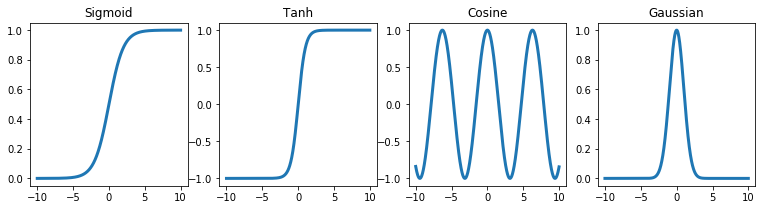

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,3))
axes[0].plot(test_inputs,sigmoid(test_inputs),linewidth=3)
axes[0].set_title("Sigmoid")
axes[1].plot(test_inputs,tanh(test_inputs),linewidth=3)
axes[1].set_title("Tanh")
axes[2].plot(test_inputs,cosine(test_inputs),linewidth=3)
axes[2].set_title("Cosine")
axes[3].plot(test_inputs,gaussian(test_inputs),linewidth=3)
axes[3].set_title("Gaussian")

## Inputs & Outputs

In [10]:
df = pd.read_csv("Data/1in_linear.txt", sep="\t", header=None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

df.head()

,x,y
0,-1.00,-1.00
1,-0.98,-0.98
2,-0.96,-0.96
3,-0.94,-0.94
4,-0.92,-0.92


In [11]:
#I thought about having our imputs and outputs as array of 1D, so maybe they can be easier to comare
data = np.loadtxt("Data/1in_tanh.txt")
data.shape

(101, 2)

In [12]:
imput = data[:, :1] 
imput.shape

(101, 1)

In [218]:
output = data[:, 1:]
output.shape

(101, 1)

## Simplified Neural Network

Source: https://www.youtube.com/watch?v=bxe2T-V8XRs




x = input <br>
W1 = weights from input layer to hidden layer <br>
z2 = x * W1 <br>
a2 = activation of z2 (x * W1) <br>
W2  weights from hidden layer to output layer <br>
z3 = a2 * W2 activation of z3 <br>
yHat = predicted output <br>

In [13]:
class SimplifiedNeuralNetwork(object):
    
    def __init__(self):
        
        self.inputLayerSize=1
        self.outputLayerSize=1
        self.hiddenlayerSize=3
                
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = np.random.choice(list(act_dict.keys()))
        self.yHat_func = np.random.choice(list(act_dict.keys()))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) # Product of input layer and weights1
        self.a2 = act_dict[self.a2_func](self.z2) # Activation & z2  
        self.z3 = np.dot(self.a2, self.W2) # Product of a2 & weights2
        yHat = act_dict[self.yHat_func](self.z3) # Activation of z3
        return yHat  
    
    def __str__(self):
        return (f"Network:W1{self.W1}, W2:{self.W2}, Imput values:{imput}, Predicted values:{yHat}") 
    
    #Helper functions for interacting with other methods/classes
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
    @property
    def getParams(self):
        array = self.W1.ravel()
        array = np.append(array,self.a2_func)
        array = np.append(array,self.W2.ravel())
        array = np.append(array,self.yHat_func)
        return array     

In [14]:
nn1 = SimplifiedNeuralNetwork()
yHat = nn1.forward(imput)
yHat.shape
#yHat, output

(101, 1)

In [20]:
dimensions = len(nn1.getParams)

In [371]:
def mse(predicted, target):
    mse = np.square(np.subtract(predicted,target)).mean()
    return mse

In [372]:
def feedForward(networks):
    for network in networks:
            yHat = network.forward(imput)
            error = rmse(yHat,output)
            network.fitness = error
    return yHat, network.fitness

In [373]:
msq = mse(yHat, output)
msq

1.0036635350982837

In [ ]:
n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

## PSO

source: https://jamesmccaffrey.wordpress.com/2015/06/09/particle-swarm-optimization-using-python/


source: https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

In [2]:
class Particle():
    
    def __init__(self,SimplifiedNeuralNetwork):
        self.position = SimplifiedNeuralNetwork.getParams
        self.velocity = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        self.personal_best = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        
    def move(self):
        self.position = self.position + self.velocity
        
def Solve(max_epochs,num_networks):
    networks = [SimplifiedNeuralNetwork() for i in range(num_networks)]
    Y = [feedForward(networks)]
    
    for network in networks:
        print(network)
        print(Y)
       


In [ ]:
class Particle:
    def __init__(self, network):
        self.position = network.getParams         # particle position
        self.velocity = []          # particle velocity
        self.pos_best = []          # best position individual
        self.err_best = float('inf')         # best error individual
        self.err = float ('inf')            # error individual
    
        

class PSO:
    def __init__(self, num_networks):
        self.alpha =  #proportion of velocity to be retained
        self.beta =  #proportion of personal best to be retained
        self.gamma =  #proportion of the informants’ best to be retained
        self.delta =  #proportion of global best to be retained
        self.epsilon =  #jump size of a particle
        
        self.swarmsize = num_networks
        self.particles = []
    
    def getParticles(self):
        for particle in self.particles:
            return particle
        
    def start(self):
        for network in self.particles
            network.SimpleNeuralNetwork()
            
    

In [24]:
np.random.uniform(-1,1)

-0.1423480170398317

In [23]:
class Particle:
    def __init__(self,network):
        self.position = np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.choice(list(act_dict.keys())), np.random.choice(list(act_dict.keys()))])         # particle position
        self.velocity = np.zeros(self.network.getParams.shape) # particle velocity
        self.pposition_best = self.position          # best position individual
        self.perr_best = float('inf')         # best error individual
        self.err = float ('inf')            # error individual
        
        # particle initial position, random generated of 4 dimensions (inside the LowLimit and UpperLimit
        # this upper and lower limit will be defined by th emax possible value of W2 W2 and a1 a2 

        
    # evaluate current fitness
    def evaluate(self,fitness):
        self.err = network.fitness #check this, can we access to values outside of the the class?

    # check to see if the current position is an individual best
        if self.err_<self.perr_best or self.perr_best==-1:
            self.pposition_best_i=self.position.copy()
            self.perr_best_i=self.err
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random()
            r2=random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
        
def PSO(costFunc, network, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions=len(network.getParams)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i<maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}')
            
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)
        
        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    print('\nFINAL SOLUTION:')
    print(f'   > {pos_best_g}')
    print(f'   > {err_best_g}\n')

    pass

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [ ]:
class Particle:
    def __init__(self,network):
        self.position = np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.choice(list(act_dict.keys())), np.random.choice(list(act_dict.keys()))])         # particle position
        self.velocity = np.zeros(self.network.getParams.shape) # particle velocity
        self.pposition_best = self.position          # best position individual
        self.perr_best = float('inf')         # best error individual
        self.err = float ('inf')            # error individual
        self.pbest_value
        # particle initial position, random generated of 4 dimensions (inside the LowLimit and UpperLimit
        # this upper and lower limit will be defined by th emax possible value of W2 W2 and a1 a2 

        
    # evaluate current fitness
    def evaluate(self,fitness):
        self.err = network.fitness #check this, can we access to values outside of the the class?

    # check to see if the current position is an individual best
        if self.err_<self.perr_best or self.perr_best==-1:
            self.pposition_best_i=self.position.copy()
            self.perr_best_i=self.err
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random()
            r2=random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
        
def PSO(costFunc, network, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions=len(network.getParams)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i<maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}')
            
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)
        
        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    print('\nFINAL SOLUTION:')
    print(f'   > {pos_best_g}')
    print(f'   > {err_best_g}\n')

    pass

In [348]:
g = np.array([1,1])
g

array([1, 1])

In [349]:
h = np.zeros(nn1.getParams.shape)
h

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [350]:
Solve(10,10)

Network:W1[[ 0.35798698 -0.63585158  0.91409955]], W2:[[-1.72076595]
 [ 0.89678756]
 [-0.33857447]], Imput value:[[-1.  ]
 [-0.98]
 [-0.96]
 [-0.94]
 [-0.92]
 [-0.9 ]
 [-0.88]
 [-0.86]
 [-0.84]
 [-0.82]
 [-0.8 ]
 [-0.78]
 [-0.76]
 [-0.74]
 [-0.72]
 [-0.7 ]
 [-0.68]
 [-0.66]
 [-0.64]
 [-0.62]
 [-0.6 ]
 [-0.58]
 [-0.56]
 [-0.54]
 [-0.52]
 [-0.5 ]
 [-0.48]
 [-0.46]
 [-0.44]
 [-0.42]
 [-0.4 ]
 [-0.38]
 [-0.36]
 [-0.34]
 [-0.32]
 [-0.3 ]
 [-0.28]
 [-0.26]
 [-0.24]
 [-0.22]
 [-0.2 ]
 [-0.18]
 [-0.16]
 [-0.14]
 [-0.12]
 [-0.1 ]
 [-0.08]
 [-0.06]
 [-0.04]
 [-0.02]
 [ 0.  ]
 [ 0.02]
 [ 0.04]
 [ 0.06]
 [ 0.08]
 [ 0.1 ]
 [ 0.12]
 [ 0.14]
 [ 0.16]
 [ 0.18]
 [ 0.2 ]
 [ 0.22]
 [ 0.24]
 [ 0.26]
 [ 0.28]
 [ 0.3 ]
 [ 0.32]
 [ 0.34]
 [ 0.36]
 [ 0.38]
 [ 0.4 ]
 [ 0.42]
 [ 0.44]
 [ 0.46]
 [ 0.48]
 [ 0.5 ]
 [ 0.52]
 [ 0.54]
 [ 0.56]
 [ 0.58]
 [ 0.6 ]
 [ 0.62]
 [ 0.64]
 [ 0.66]
 [ 0.68]
 [ 0.7 ]
 [ 0.72]
 [ 0.74]
 [ 0.76]
 [ 0.78]
 [ 0.8 ]
 [ 0.82]
 [ 0.84]
 [ 0.86]
 [ 0.88]
 [ 0.9 ]
 [ 0.92]
 [ 0.94]
 [ 0.

## Real time-data



In [228]:
import time
import psutil

In [229]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml' #to configure matplotlib in jupyter notebook

<IPython.core.display.Javascript object>


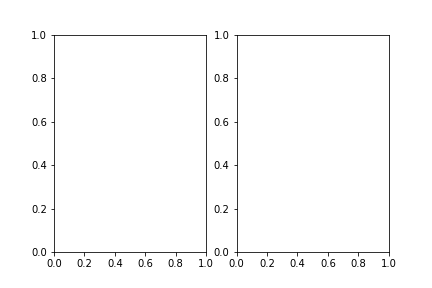

In [230]:
fig = plt.figure()
output_plot = fig.add_subplot(121) # two sublots. 
mse_plot = fig.add_subplot(122)

fig.show()

In [236]:
# Provide some real time data
x1, y1 = [], []
x2, y2 = [], []

while True:
    x1.append(imput)
    y2.append(yHat)
    
    x2.append(imput)
    y2.append(network.mse)
    
    output_plot.plot(x1, y1, color='b')
    mse_plot.plot(x2,y2)
    
    fig.canvas.draw()
    
    output_plot.set_xlim(left=max(0, i-50), right=i+50)
    
    #time.sleep(0.1)
    
    #I've got an error since we need to put the imput an output as same 1
    

AttributeError: 'SimplifiedNeuralNetwork' object has no attribute 'mse'

In [374]:
# https://github.com/nathanrooy/particle-swarm-optimization/blob/master/pso/pso_simple.py